## Exploratory Data Analysis: Credit Card Fraud Data

### 1. Setup & Data Loading

In [5]:
import sys
sys.path.append("..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Load data
data_dir = Path("../data/raw")
cc_df = pd.read_csv(data_dir / "creditcard.csv")
print("Dataset shape:", cc_df.shape)
cc_df.head()

Dataset shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 1.1 Systematic Data Cleaning

In [6]:
from src.data_loader import clean_fraud_data
fraud_df = clean_fraud_data(cc_df)
print("Missing values after cleaning:", fraud_df.isnull().sum().sum())
print("Duplicates after cleaning:", fraud_df.duplicated().sum())

Missing values after cleaning: 0
Duplicates after cleaning: 0


### 2. Dataset Overview

In [3]:
print("=== Basic Info ===")
cc_df.info()

print("\n=== Missing Values ===")
print(cc_df.isnull().sum().sum())

print("\n=== Duplicate Rows ===")
print("Duplicates:", cc_df.duplicated().sum())

# Class distribution
class_counts = cc_df['Class'].value_counts()
print("\n=== Class Distribution ===")
print(class_counts)
print(f"Fraud rate: {class_counts[1] / len(cc_df):.6%}")

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

### 3. Class Distribution (Extreme Imbalance)

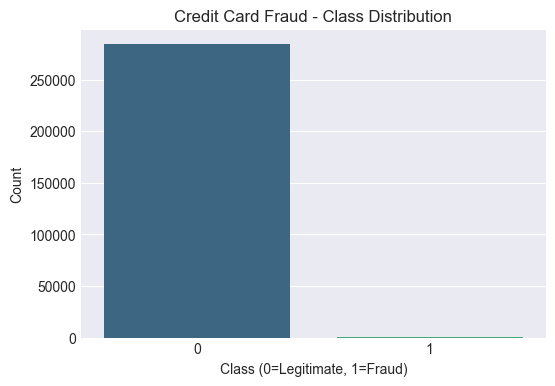

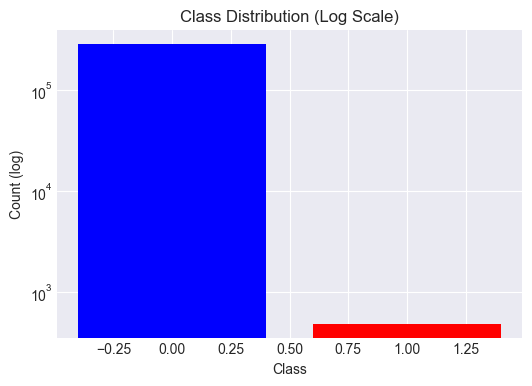

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Credit Card Fraud - Class Distribution')
plt.xlabel('Class (0=Legitimate, 1=Fraud)')
plt.ylabel('Count')
plt.show()

# Log scale for clarity
plt.figure(figsize=(6,4))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.yscale('log')
plt.title('Class Distribution (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Count (log)')
plt.show()

### 4. Time and Amount Analysis

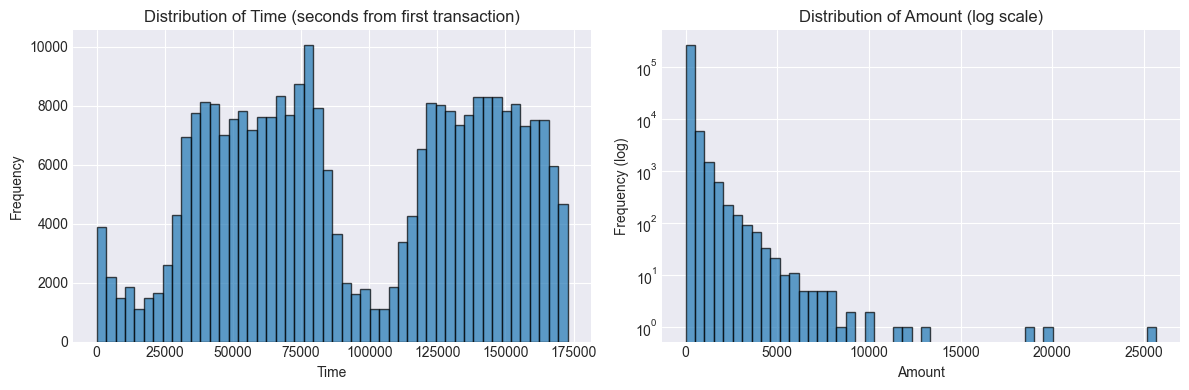

Amount statistics:
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
# Time distribution
axes[0].hist(cc_df['Time'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Time (seconds from first transaction)')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Frequency')
# Amount distribution (log scale due to skew)
axes[1].hist(cc_df['Amount'], bins=50, edgecolor='black', alpha=0.7, log=True)
axes[1].set_title('Distribution of Amount (log scale)')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency (log)')
plt.tight_layout()
plt.show()

print("Amount statistics:")
print(cc_df['Amount'].describe())

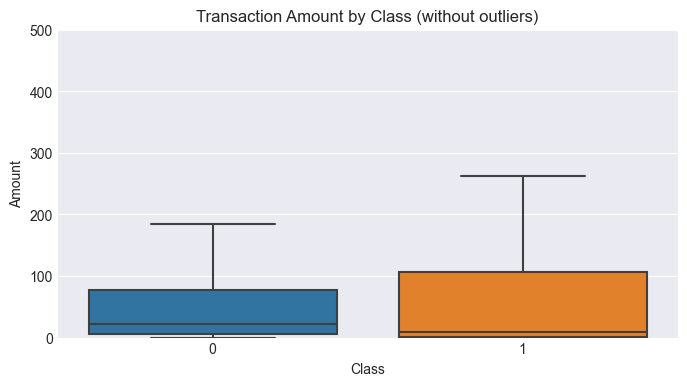

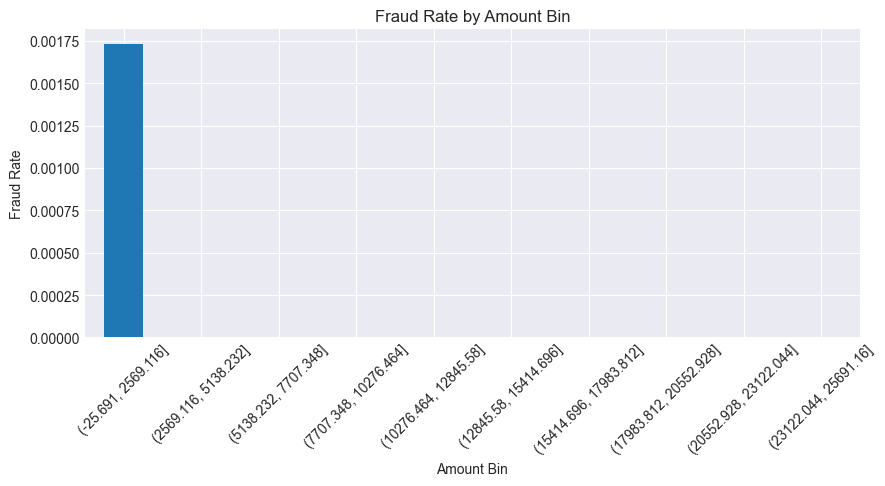

In [6]:
# Boxplot of Amount by Class (zoom in with ylim)
plt.figure(figsize=(8,4))
sns.boxplot(data=cc_df, x='Class', y='Amount', showfliers=False)
plt.title('Transaction Amount by Class (without outliers)')
plt.ylim(0, 500)
plt.show()

# Fraud rate by amount bins
cc_df['Amount_bin'] = pd.cut(cc_df['Amount'], bins=10)
amt_fraud_rate = cc_df.groupby('Amount_bin')['Class'].mean()
plt.figure(figsize=(10,4))
amt_fraud_rate.plot(kind='bar')
plt.title('Fraud Rate by Amount Bin')
plt.xlabel('Amount Bin')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

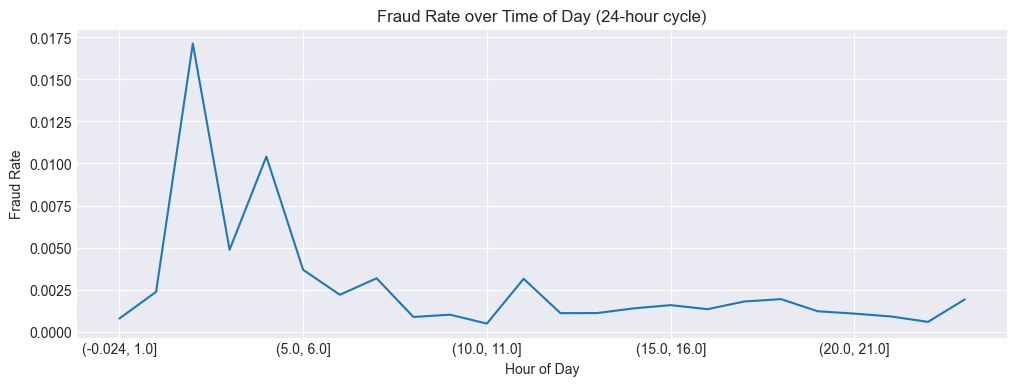

In [7]:
# Convert Time to hours for interpretability
cc_df['Time_hours'] = cc_df['Time'] / 3600
# Bin time into 24-hour cycles
cc_df['Time_mod_24h'] = cc_df['Time_hours'] % 24
time_fraud = cc_df.groupby(pd.cut(cc_df['Time_mod_24h'], bins=24))['Class'].mean()
plt.figure(figsize=(12,4))
time_fraud.plot()
plt.title('Fraud Rate over Time of Day (24-hour cycle)')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.show()